# Librerías

In [ ]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

# Data Acquisition


In [ ]:
#Hacemos el dataframe y le sacamos la columna unnamed: 0 porque es el indice repetido
df = pd.read_csv('/content/german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Data Wrangling

In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Eliminamos la columna 'Unnamed: 0' que es idéntica al índice

In [ ]:
df.drop('Unnamed: 0', inplace= True, axis=1)
df.head(100)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
95,58,male,2,rent,little,moderate,15945,54,business,bad
96,61,female,2,own,NaN,NaN,2012,12,education,good
97,34,male,2,own,moderate,moderate,2622,18,business,good
98,36,male,2,own,little,moderate,2337,36,radio/TV,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Nos deshacemos de la columna cheking account porque no nos es de interes para la investigación per se y además es la que más NaN tiene de todos.

In [ ]:
df.drop('Checking account', inplace= True, axis=1)

Eliminamos los registros que contienen NaN en "Saving accounts" ya que es una variabla categórica (no podemos reemplazar por media o mediana), y además representa solo el 18% del dataset.

In [ ]:
df.dropna(inplace = True)

In [ ]:
#Reiniciamos el indice 
df.reset_index(inplace = True)

In [ ]:
#Borramos la columna que dejó dropna con los viejos indices
df.drop('index', inplace= True, axis=1)

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,5951,48,radio/TV,bad
1,49,male,1,own,little,2096,12,education,good
2,45,male,2,free,little,7882,42,furniture/equipment,good
3,53,male,2,free,little,4870,24,car,bad
4,53,male,2,own,quite rich,2835,24,furniture/equipment,good


In [ ]:
df.shape

(817, 9)

# Analisis de los datos (uni, bi y multivariado)

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Es importante notar que la columna job es en realidad categorica, y acá están las equivalencias según kaggle: Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,5951,48,radio/TV,bad
1,49,male,1,own,little,2096,12,education,good
2,45,male,2,free,little,7882,42,furniture/equipment,good
3,53,male,2,free,little,4870,24,car,bad
4,53,male,2,own,quite rich,2835,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...
812,31,female,1,own,little,1736,12,furniture/equipment,good
813,40,male,3,own,little,3857,30,car,good
814,38,male,2,own,little,804,12,radio/TV,good
815,23,male,2,free,little,1845,45,radio/TV,bad


In [ ]:
df.head(8)

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,5951,48,radio/TV,bad
1,49,male,1,own,little,2096,12,education,good
2,45,male,2,free,little,7882,42,furniture/equipment,good
3,53,male,2,free,little,4870,24,car,bad
4,53,male,2,own,quite rich,2835,24,furniture/equipment,good
5,35,male,3,rent,little,6948,36,car,good
6,61,male,1,own,rich,3059,12,radio/TV,good
7,28,male,3,own,little,5234,30,car,bad


In [ ]:
df.tail(20)

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
797,64,female,2,own,little,753,6,radio/TV,good
798,47,male,1,own,little,2538,24,car,bad
799,25,male,2,rent,moderate,1264,15,car,bad
800,49,male,2,own,little,8386,30,furniture/equipment,bad
801,33,male,3,rent,little,4844,48,business,bad
802,28,female,3,own,moderate,2923,21,car,good
803,26,male,2,own,little,8229,36,car,bad
804,30,male,1,own,little,2028,24,furniture/equipment,good
805,25,female,2,rent,little,1433,15,furniture/equipment,good
806,33,male,2,own,little,6289,42,business,good


In [ ]:
descripcion = df.describe().T
descripcion['median'] = df.median()
descripcion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,count,mean,std,min,25%,50%,75%,max,median
Age,817.0,35.127295,11.348251,19.0,26.0,32.0,41.0,75.0,32.0
Job,817.0,1.894737,0.653935,0.0,2.0,2.0,2.0,3.0,2.0
Credit amount,817.0,3128.990208,2731.688353,250.0,1355.0,2241.0,3850.0,18424.0,2241.0
Duration,817.0,20.496940,11.841490,4.0,12.0,18.0,24.0,72.0,18.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              817 non-null    int64 
 1   Sex              817 non-null    object
 2   Job              817 non-null    int64 
 3   Housing          817 non-null    object
 4   Saving accounts  817 non-null    object
 5   Credit amount    817 non-null    int64 
 6   Duration         817 non-null    int64 
 7   Purpose          817 non-null    object
 8   Risk             817 non-null    object
dtypes: int64(4), object(5)
memory usage: 57.6+ KB


In [ ]:
df.shape

(817, 9)

In [ ]:
pfl = pandas_profiling.ProfileReport(df)
pfl

Output hidden; open in https://colab.research.google.com to view.

Como se puede apreciar en el siguiente gráfico, la mayoría de los solicitantes de préstamos tienen entre 25 y 40 años.

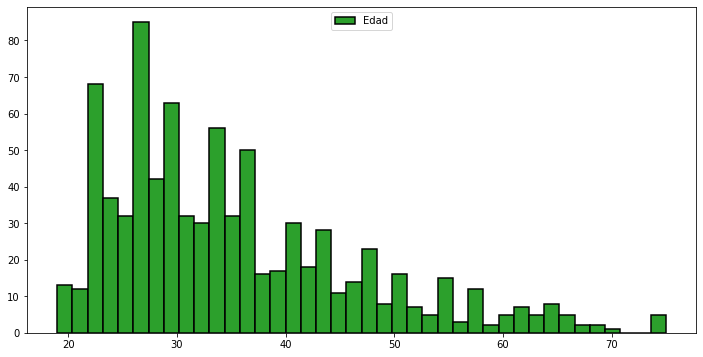

In [ ]:
fig,ax= plt.subplots(figsize=(12,6))
ax.hist(df['Age'],bins=40,label='Edad',color='C2',edgecolor='black',linewidth=1.5)
ax.legend(loc=9)
fig.show()

Acá se ve más claramente que la mayoría de gente que pide créditos está entre los 25 y 40 años (75%)

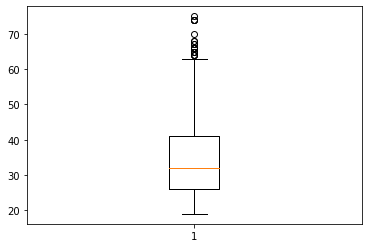

In [ ]:
plt.boxplot(df['Age'])
fig.show()

Duration vs Credit Amount 


*   Aquí se ve de manera bastente debil que hay una correlación positiva entre el monto y la duración del credito. 
*   Una hipotesis de ésta correlación es que la personas que toman un crédito tienen un límite en la capacidad de pago por lo que para tomar más crédito necesariamente deben extender los plazos.



Text(0.5, 1.0, 'Relacion entre Monto del crédito y Duración')

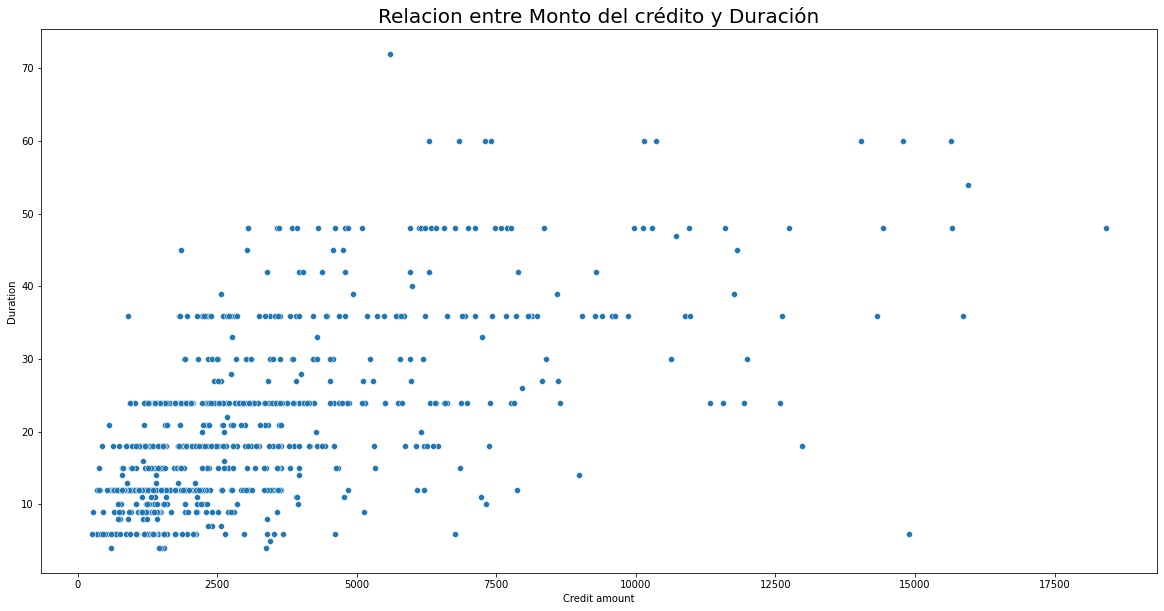

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Credit amount", y="Duration", data=df)
plt.title('Relacion entre Monto del crédito y Duración', fontsize = 20, fontweight = 30)

Age vs Credit Amount

*   Visualmente la correlación es casi nula, lo que se condice con el coeficiente cercano a cero.




Text(0.5, 1.0, 'Relacion entre Edad y Montos')

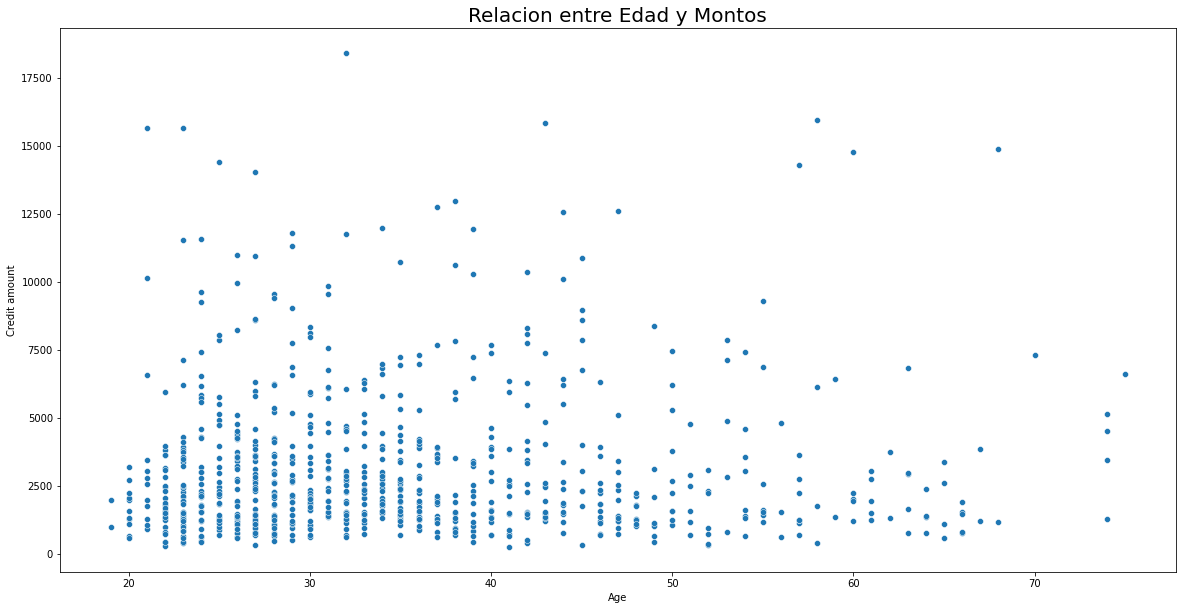

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Age", y="Credit amount", data=df)
plt.title('Relacion entre Edad y Montos', fontsize = 20, fontweight = 30)

Age vs Purpose

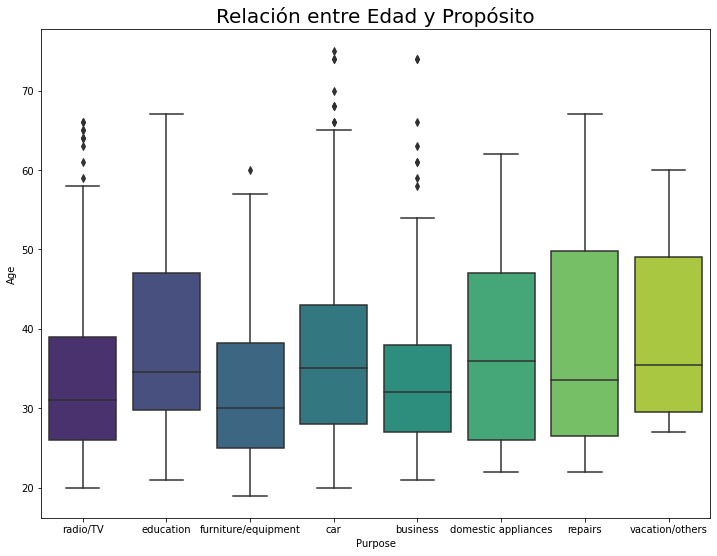

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(y=df['Age'],x=df['Purpose'], palette = 'viridis')
plt.title('Relación entre Edad y Propósito', fontsize = 20)
plt.show()

Credit Amount vs Risk (target)

*   A mayores montos el riesgo empeora.




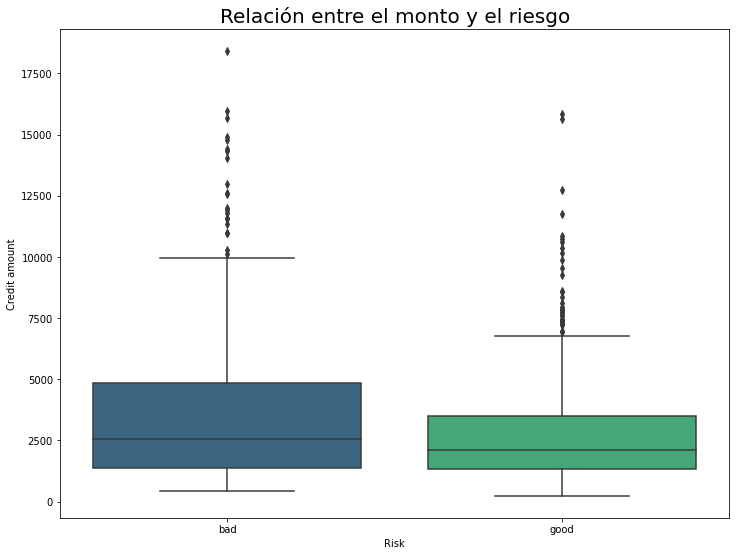

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(y=df['Credit amount'],x=df['Risk'], palette = 'viridis')
plt.title('Relación entre el monto y el riesgo', fontsize = 20)
plt.show()

Age vs Risk (target)


*   Visualmente podemos apreciar que la gente de mayor edad parece ser más segura o confiable. Esta afirmación carece de rigor estadístico, habría que plantear un test de hipótesis para rechazar la igualdad de las medias de edad entre good y bad risk.



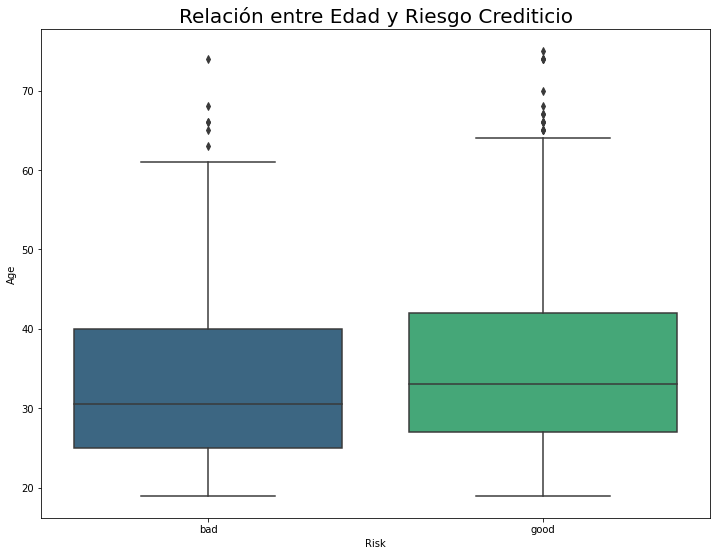

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(y=df['Age'],x=df['Risk'], palette = 'viridis')
plt.title('Relación entre Edad y Riesgo Crediticio', fontsize = 20)
plt.show()

Sex vs Credit amount

*   Aquí se puede notar una muy leve tendencia de las mujeres a pedír creditos más altos en comparación a los hombres.



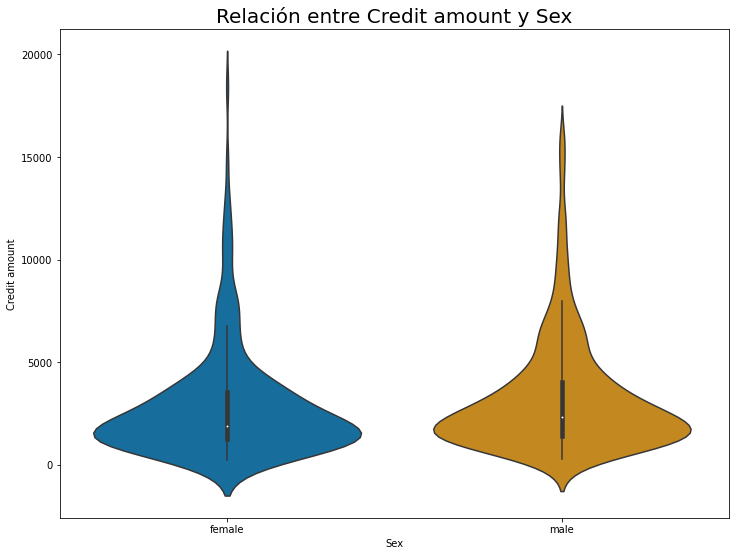

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(y=df['Credit amount'], x=df['Sex'], palette = 'colorblind')
plt.title('Relación entre Credit amount y Sex', fontsize = 20, fontweight = 30)
plt.show()

Credit Amount vs Housing vs Purpose

*   Los que rentan tienden a no sacar prestamos para vacaciones/otros.
*   Los que no tienen casa, por motivos logicos, no piden prestamos para uso domestico.
*   Parece haber una relación inversa entre pagar alquiler y sacar prestamos(suponiendo que los propietarios lo fueran al 100% y no que tuvieran hipotecas) para cosas relacionadas al ocio.

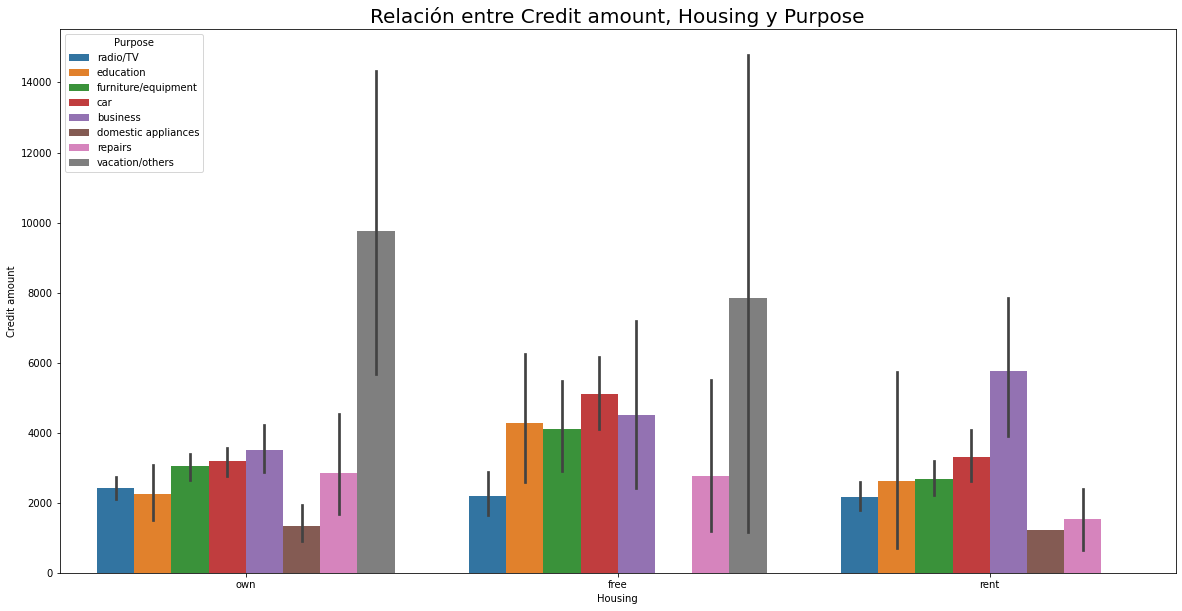

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(data = df, x = 'Housing', y = 'Credit amount', hue = 'Purpose')
plt.title('Relación entre Credit amount, Housing y Purpose', fontsize = 20, fontweight = 30)
plt.show()

Sex vs Job vs Duration

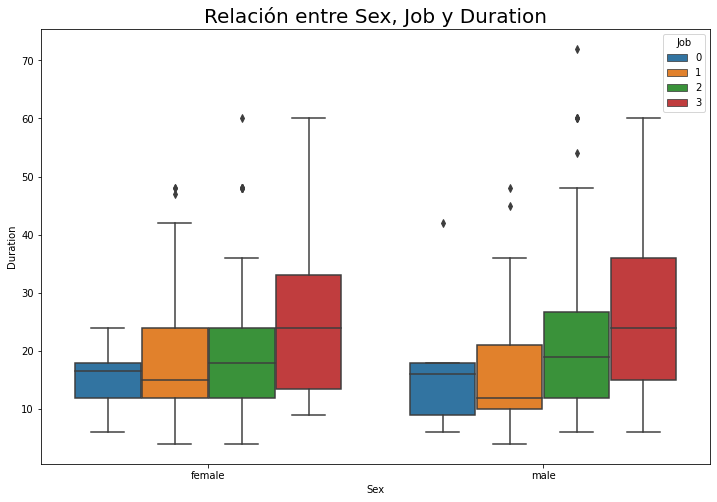

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df, x = 'Sex', hue = 'Job', y = 'Duration')
plt.title('Relación entre Sex, Job y Duration', fontsize = 20, fontweight = 30)
plt.show()

Age vs Credit Amount vs Duration

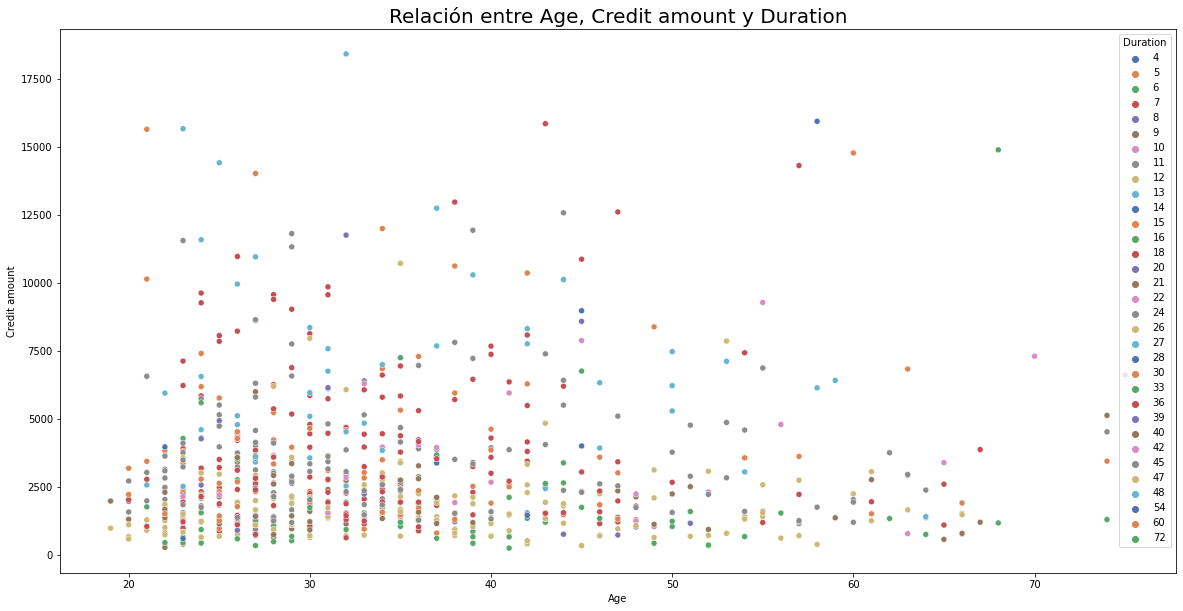

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = df, x = 'Age', y = 'Credit amount', hue = 'Duration', palette = 'deep')
plt.title('Relación entre Age, Credit amount y Duration', fontsize = 20, fontweight = 30)
plt.show()

Age vs Purpose vs Sex

*   Es visible como los hombres de todas las edades sacan credito preferentemente para autos, muy por encima de la cantidad de mujeres.
*   Tambien se puede observar que a partir de los 50 no sacan tantos creditos para radio/TV.
*   Se puede observar que los hombres jovenes (20-35) sacan más creditos con fines de negocios.
*   Podría agregarse que las mujeres de 20 a 25 años tienen tendencia a sacar créditos para Equipamiento o Amoblar (una casa).






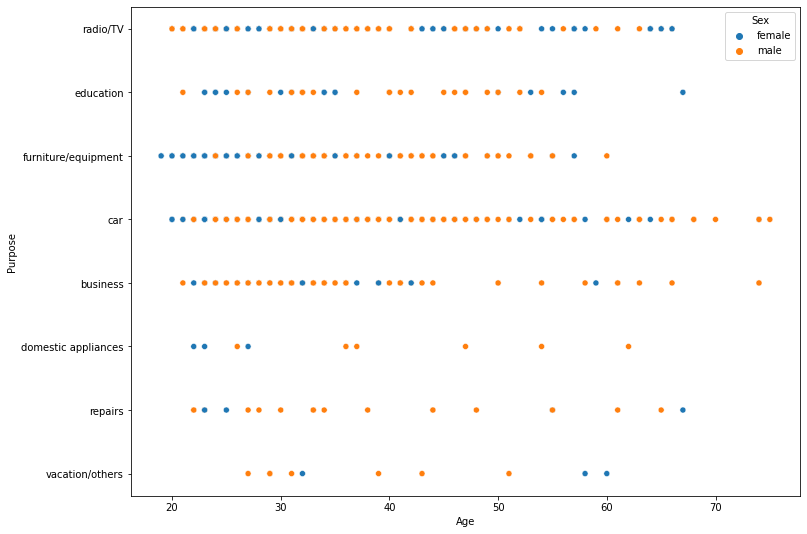

In [ ]:
sns.scatterplot(data = df, x ='Age', y = 'Purpose', hue = 'Sex' )

Credit Amount vs Job vs Sex

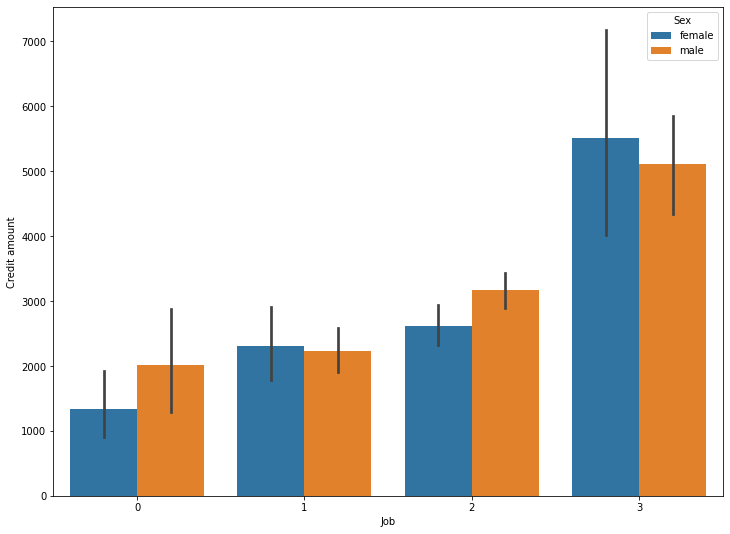

In [ ]:
sns.barplot(data = df, y ='Credit amount', x = 'Job', hue = 'Sex' )

Housing vs Duration vs Sex

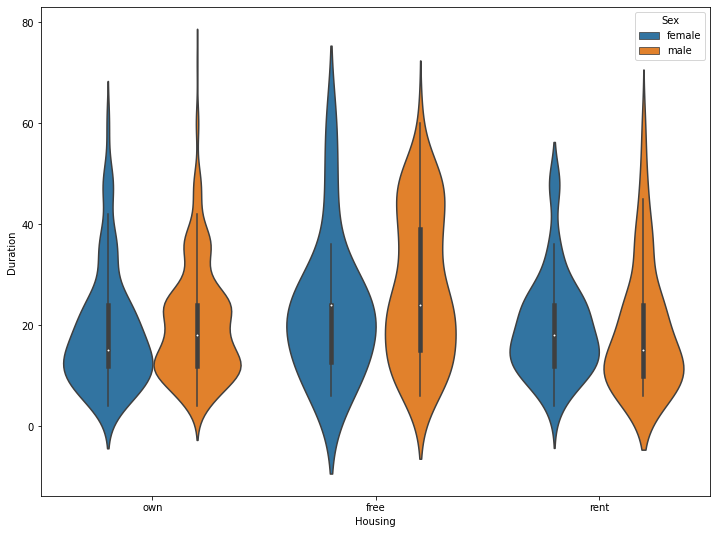

In [ ]:
sns.violinplot(data = df, x ='Housing', y = 'Duration', hue = 'Sex' )

HeatMap del DataFrame

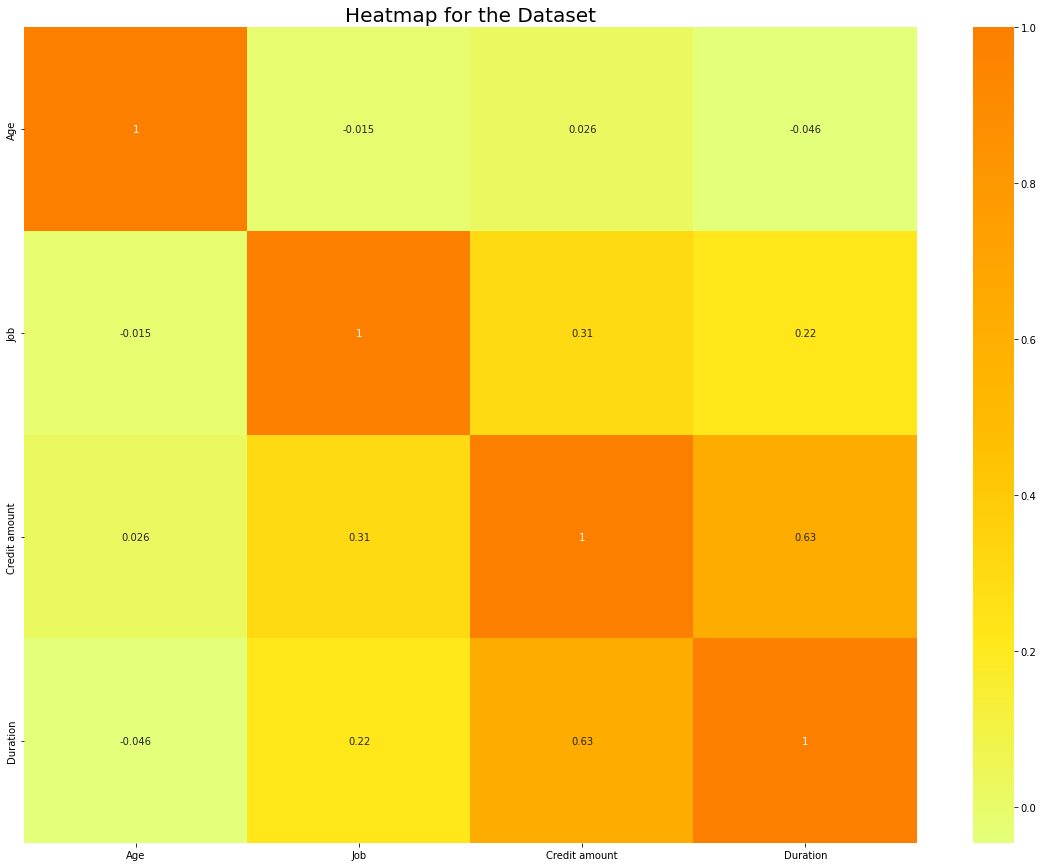

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

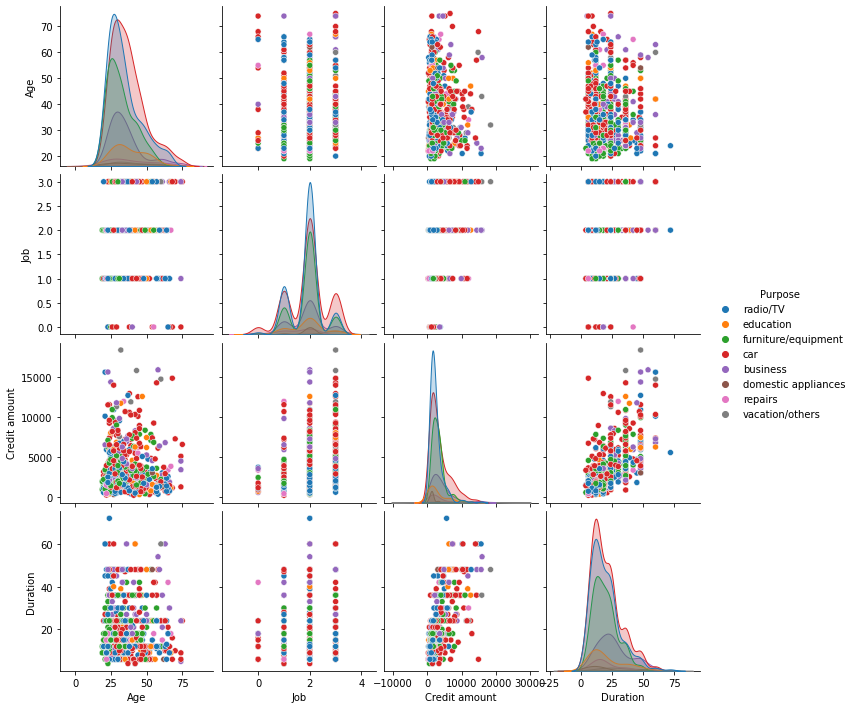

In [ ]:
sns.pairplot(df, hue='Purpose')

#Modelos de Machine Learning

Abordaremos **Modelos Supervisados de Clasificación**: Dado que contamos con una variable Target que nos permite realizar una clasificación. Además la mayoria de nuestras variables, incluida la variable target, son categoricas.


## Preparación de los datos: Features y Target

Separamos los features en X e Y. Nuestra variable Target (y) es "Risk". 

In [ ]:
y = df['Risk']
X = df.drop('Risk', axis = 1)

In [ ]:
X2 = pd.get_dummies(X)

In [ ]:
type(X2)

pandas.core.frame.DataFrame

Separamos los datos en Train (70 %) y Test (30 %) con un random_state=42.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=42)

In [ ]:
X_train.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Saving accounts_quite rich,Saving accounts_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
309,34,2,2320,18,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
424,20,2,585,12,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
132,70,3,7308,10,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
655,32,2,3062,24,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
316,40,3,7374,18,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


Creamos las siguientes listas para luego armar con DataFrame con el registro de la precisión de cada algoritmo ejecutado

In [ ]:
resultados=[]
training=[]

## Árbol de Decisión

Creamos modelo

In [ ]:
modelo = DecisionTreeClassifier(max_depth=4,random_state=42)

In [ ]:
#Corroboramos
type(modelo)

sklearn.tree._classes.DecisionTreeClassifier

Entrenamos

In [ ]:
modelo.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Predecimos 

In [ ]:
y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

Evaluamos

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)


Train accuracy:  0.7355516637478109
Test accuracy:  0.6951219512195121


Guardamos resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

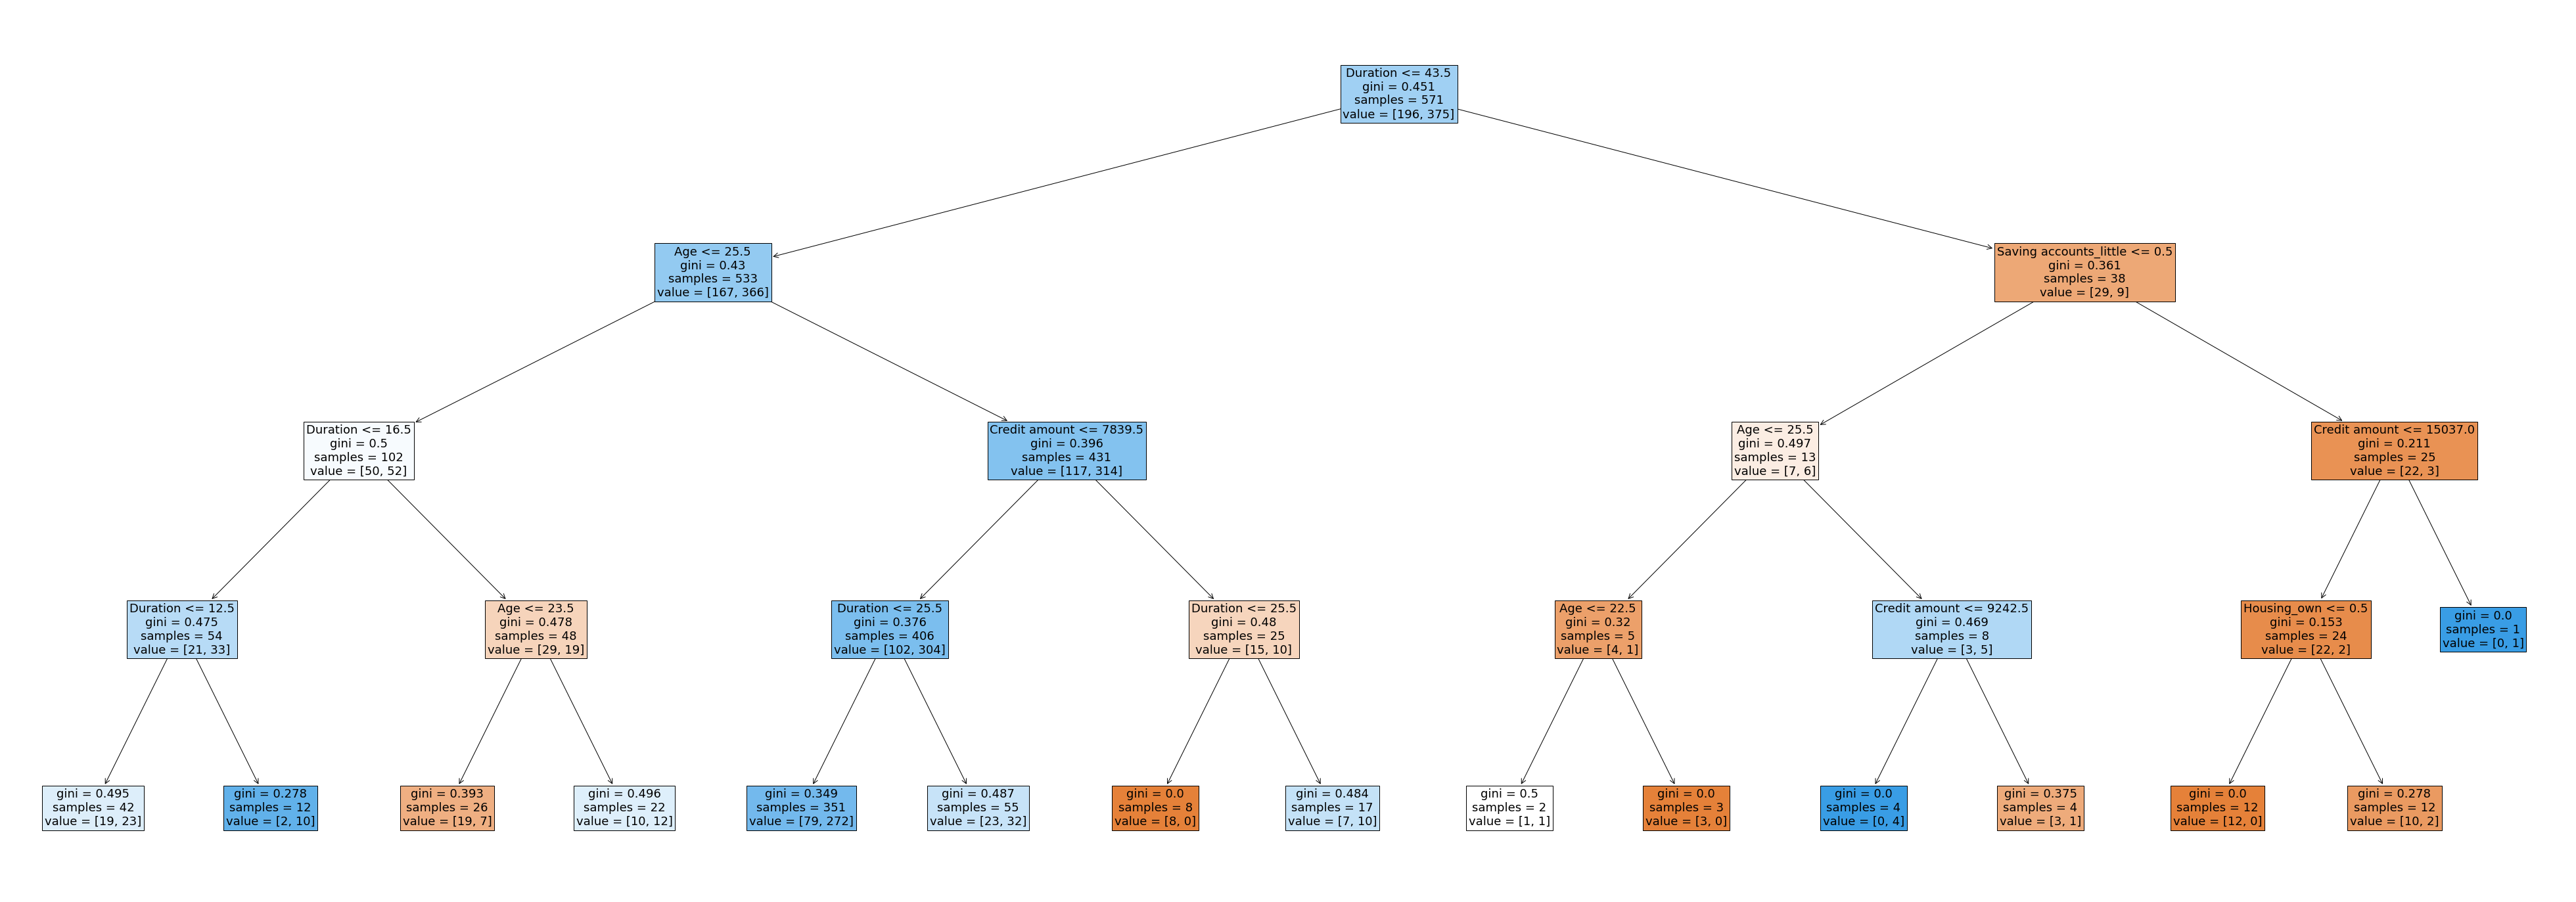

In [ ]:
plt.figure(figsize=(70,25))
plot_tree(modelo,filled=True,feature_names=X_train.columns, fontsize=18);

In [ ]:
a = X_train.sample(random_state=16) #random_state=16
a

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Saving accounts_quite rich,Saving accounts_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
701,32,1,1442,18,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
a = pd.DataFrame(X_train.iloc[5,:])
a

,446
Age,45
Job,1
Credit amount,3049
Duration,18
Sex_female,1
Sex_male,0
Housing_free,0
Housing_own,1
Housing_rent,0
Saving accounts_little,1


In [ ]:
y_train.iloc[5]

'good'

In [ ]:
modelo.predict(a.T)

array(['good'], dtype=object)

## Random Forest

Creamos modelo

In [ ]:
#Creamos un random forest!
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")

Entrenamos

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

Predecimos

In [ ]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

Evaluamos

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  1.0
Test accuracy:  0.7195121951219512


Guardamos resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

##KNN: K-Nearest-Neighbor

Creamos modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

Entrenamos

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Predecimos

In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

Evaluamos

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.7863397548161121
Test accuracy:  0.6219512195121951


Guardamos resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

##Regresión Logística

Creamos modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Entrenamos

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Predecimos

In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

Evaluamos

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.712784588441331
Test accuracy:  0.7276422764227642


Guardamos resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

## SVM: Support Vector Machines

Creamos modelo

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10)

Entrenamos

In [ ]:
model.fit(X_train,y_train)

SVC(C=10)

Predecimos

In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

Evaluamos

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.6742556917688266
Test accuracy:  0.7113821138211383


Guardamos resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

##Análisis de Resultados

In [ ]:
df_resultados = pd.DataFrame(resultados,index=['Arbol','RF','kNN','LogReg','SVM'], columns=['Test'])
df_resultados['Training']=training
df_resultados['Dif']=df_resultados.Test - df_resultados.Training
df_resultados

,Test,Training,Dif
Arbol,0.695122,0.735552,-0.040430
RF,0.719512,1.000000,-0.280488
kNN,0.621951,0.786340,-0.164389
LogReg,0.727642,0.712785,0.014858
SVM,0.711382,0.674256,0.037126


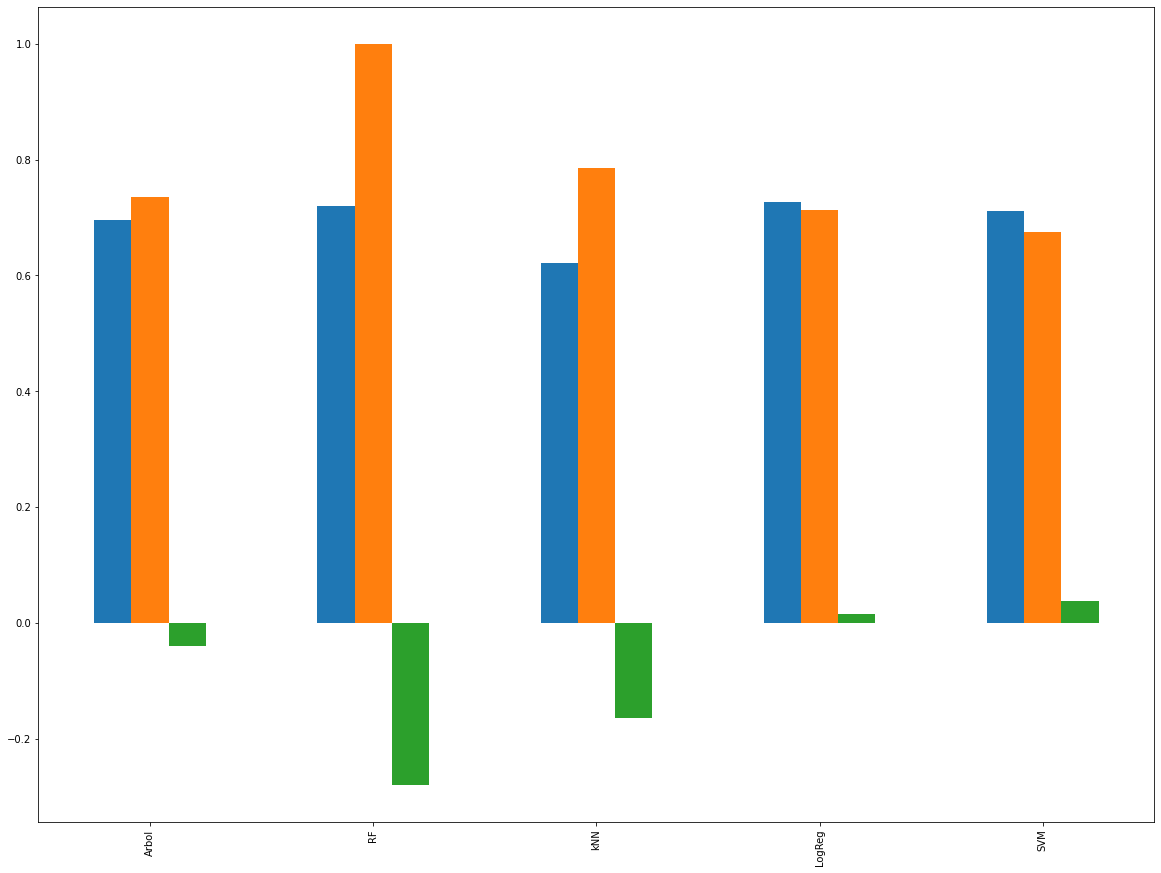

In [ ]:
axes = df_resultados.plot.bar()
axes.legend(loc='center')
axes.get_legend().remove()


**Conclusiones**


*   El modelo con mejor precisión en el dataset de prueba fue *Regresión Logística*.
*   El modelo con mejor precisión en el dataset de entrenamiento fue *Random Forest*, alcanzo una accuracy del 100%. Esto muy probablemente nos indique un overfitting o sobreajuste sobre el conjunto de entrenamiento. Mucha varianza.

*   Si bien la precisión alcanzada por los modelos de Random Forest, SVM y hasta inclusive el de Árbol de Decisión en el dataset de Test es muy similar al de Regresión Logística, todos cercanos al 70%; Consideramos que **Regresión Logística** es el modelo más adecuado dado que es el que menor diferencia en precisión tiene con respecto al conjunto de prueba (diferencia de 1%). Esto nos denota una gran estabilidad y demuestra que el algoritmo aprendió muy bien el patrón de comportamiento de los datos. 






# Hipertunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

## Grid Search

### Random Forest

In [ ]:
#Creamos nuestro objeto Random Forest
rf = RandomForestClassifier(random_state=11)

Parametros utilizados en RandomForest anteriormente (random_state=11, n_estimators=200, class_weight="balanced", max_features="log2")

Definimos los hyperparametros que queremos probar

In [ ]:
param_grid = {
    'max_depth': [4,5,6,7,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [100, 200, 300, 1000]
}


Creamos el modelo utilizando el modelo de RandomForest, los hyperparámetros y definiendo Cross Validation con K-fold=3

In [ ]:
model = GridSearchCV(rf, param_grid=param_grid, cv=3)

In [ ]:
#La cantidad de combinaciones que explorará nuestra grilla
5*3*4

60

In [ ]:
#Entrenamos nuestro modelo de RaandomForest con la grilla ya definida y CV con tamaño de Fold=3
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 1000]})

¿Cuáles son los mejores parámetros?

In [ ]:
print("Mejores parametros: "+str(model.best_params_))

Mejores parametros: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}


In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.7583187390542907
Test accuracy:  0.7479674796747967


Este modelo de Random Forest con hyperparámetros tuneados mejora abruptamente con lo hecho en la sección anterior con hyperparámetros predeterminados. En primer lugar vemos como eliminamos el overfitting del conjunto de entrenamiento, pasando de 100% a 75,8% ; luego la precisión mejora casi un 3% incluso superando la precisión alcanzada por Regresión Logística alcanzando un 74,8%. 

A su vez la diferencia entre la precisión de test y train es muy baja, por lo que este modelo andaría muy bien para realizar predicciones. 

In [ ]:
df2 = pd.DataFrame(test_accuracy,index=['RF_Tuneado'],columns=['Test'])
df2['Training']=train_accuracy
df2['Dif']=df2.Test - df2.Training
df2

,Test,Training,Dif
RF_Tuneado,0.747967,0.758319,-0.010351


In [ ]:
res= pd.concat([df_resultados,df2])
res

,Test,Training,Dif
Arbol,0.695122,0.735552,-0.040430
RF,0.719512,1.000000,-0.280488
kNN,0.621951,0.786340,-0.164389
LogReg,0.727642,0.712785,0.014858
SVM,0.711382,0.674256,0.037126
RF_Tuneado,0.747967,0.758319,-0.010351


### KNN

In [ ]:
#Creamos nuestro objeto KNN
knn = KNeighborsClassifier()

Parámetro utilizado en KNN anteriormente (n_neighbors=3)

In [ ]:
#Definicion de Hyperparámetros
param_grid = {'n_neighbors':np.arange(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

#Utilizamos la grilla definida anteriormente...
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

In [ ]:
9*2*5*2
#Esta es la cantidad de combinaciones de Hiperparametros (9 nneighbors, 2 weights, 5 leaf size, 2 algoritm)

180

In [ ]:
#Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'uniform'}
Mejor Score: 0.6217086193745233



In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.mean_test_score.max()

0.6217086193745233

In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.7092819614711033
Test accuracy:  0.6869918699186992


In [ ]:
df3 = pd.DataFrame(test_accuracy,index=['KNN_Tuneado'],columns=['Test'])
df3['Training']=train_accuracy
df3['Dif']=df3.Test - df3.Training
res= pd.concat([res,df3])
res

,Test,Training,Dif
Arbol,0.695122,0.735552,-0.040430
RF,0.719512,1.000000,-0.280488
kNN,0.621951,0.786340,-0.164389
LogReg,0.727642,0.712785,0.014858
SVM,0.711382,0.674256,0.037126
RF_Tuneado,0.747967,0.758319,-0.010351
KNN_Tuneado,0.686992,0.709282,-0.022290


In [ ]:
# Matriz de Confusion
cm = confusion_matrix(y_test,y_test_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[ 18  54]
 [ 23 151]]


##Random Search

Aplicamos Random Search solo a KNN, realizando 100 iteraciones (casi la mitad que grid search)

In [ ]:
import scipy as sp
sp.stats.randint(1, 10)

In [ ]:
# Grilla para Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

#Aplicamos la grilla al modelo
model = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0, cv=5)

In [ ]:
#Entrenamos KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd7c7af69d0>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd7bd917d50>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 7, 'n_neighbors': 9, 'weights': 'uniform'}
Mejor Score: 0.6217086193745233



In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.7092819614711033
Test accuracy:  0.6869918699186992


Como los mejores hyperparámetros encontrados son los mismos que en GridSearch, los resultados de precisión son los mismos.